# 1. Load runtime table

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

index_info_df = pd.read_csv('cases/full/index-info.tsv', sep='\t')
index_info_df.loc[index_info_df['Name'] == '0810PADBR-1', 'Organism'] = 'Campylobacter jejuni'
index_info_df.loc[index_info_df['Name'] == '1405WAEXK-1', 'Organism'] = 'Escherichia coli'
index_info_df.loc[index_info_df['Name'] == '1408MLGX6-3WGS', 'Organism'] = 'Listeria monocytogenes'
index_info_df.loc[index_info_df['Name'] == '1203NYJAP-1 - Tuna Scrape Outbreak', 'Organism'] = 'Salmonella enterica'

execution_order = ['Campylobacter jejuni', 'Escherichia coli',
                  'Listeria monocytogenes', 'Salmonella enterica']

# Calculated from an empty index "gdi init" and
# "gdi db size --unit B"
empty_index_size_bytes = 208896

for idx, organism in enumerate(execution_order):
    for iteration in [1, 2, 3]:
        index_size_iteration_value = index_info_df.loc[(index_info_df['Organism'] == organism) & \
                  (index_info_df['Iteration'] == iteration), 'Index size'].tolist()[0]
            
        if idx == 0:
            index_info_df.loc[(index_info_df['Organism'] == organism) & \
                              (index_info_df['Iteration'] == iteration),
                              'Index size (organism)'] = index_size_iteration_value - 208896
        else:
            organism_prev = execution_order[idx - 1]
            index_size_iteration_value_prev = index_info_df.loc[(index_info_df['Organism'] == organism_prev) & \
                      (index_info_df['Iteration'] == iteration), 'Index size'].tolist()[0]
            
            index_info_df.loc[(index_info_df['Organism'] == organism) & \
                              (index_info_df['Iteration'] == iteration),
                              'Index size (organism)'] = index_size_iteration_value - index_size_iteration_value_prev
index_info_df

,Name,Iteration,Number samples,Number features (all),Number features (no unknown),Number cores,Reference length,Analysis runtime,Analysis memory (max),Analysis memory (max/process),...,Index memory (max),Index memory (max/process),Index size,Tree runtime,Tree memory (max),Tree memory (max/process),Total runtime,Max memory,Organism,Index size (organism)
0,0810PADBR-1,1,22,45117,1102,4,1634890,3164.56,1.500910e+10,3.427922e+09,...,2.071814e+09,6.979912e+08,46727168.0,24.00,5.445837e+08,276525056.0,3243.18,1.500910e+10,Campylobacter jejuni,46518272.0
1,1405WAEXK-1,1,9,45117,1102,4,5412686,994.01,5.358551e+09,1.683341e+09,...,3.805688e+09,3.805688e+09,134746112.0,28.95,8.188109e+08,459202560.0,1244.60,5.358551e+09,Escherichia coli,88018944.0
2,1408MLGX6-3WGS,1,31,45117,1102,4,2939733,2391.66,1.000337e+10,1.928913e+09,...,2.557604e+09,9.619333e+08,174039040.0,33.22,9.946153e+08,660717568.0,2543.26,1.000337e+10,Listeria monocytogenes,39292928.0
3,1203NYJAP-1 - Tuna Scrape Outbreak,1,23,45117,1102,4,4808805,1494.16,6.852243e+09,1.370481e+09,...,5.870498e+09,2.774364e+09,251240448.0,37.49,1.334784e+09,869670912.0,1849.95,6.852243e+09,Salmonella enterica,77201408.0
4,0810PADBR-1,2,22,45117,1102,4,1634890,3151.42,1.531215e+10,3.428192e+09,...,2.244510e+09,7.115858e+08,46723072.0,20.43,5.445059e+08,276520960.0,3228.08,1.531215e+10,Campylobacter jejuni,46514176.0
5,1405WAEXK-1,2,9,45117,1102,4,5412686,982.97,5.382439e+09,1.683649e+09,...,3.806372e+09,3.806372e+09,134230016.0,31.66,8.181187e+08,458653696.0,1241.70,5.382439e+09,Escherichia coli,87506944.0
6,1408MLGX6-3WGS,2,31,45117,1102,4,2939733,2405.54,9.751671e+09,1.928995e+09,...,2.675294e+09,1.042084e+09,173305856.0,37.04,9.947341e+08,660516864.0,2559.68,9.751671e+09,Listeria monocytogenes,39075840.0
7,1203NYJAP-1 - Tuna Scrape Outbreak,2,23,45117,1102,4,4808805,1505.96,6.610252e+09,1.370345e+09,...,6.125785e+09,2.999583e+09,248102912.0,39.43,1.335644e+09,870047744.0,1838.19,6.610252e+09,Salmonella enterica,74797056.0
8,0810PADBR-1,3,22,45117,1102,4,1634890,3137.54,1.460082e+10,3.428102e+09,...,2.265334e+09,7.472660e+08,46706688.0,21.82,5.445878e+08,276344832.0,3212.38,1.460082e+10,Campylobacter jejuni,46497792.0
9,1405WAEXK-1,3,9,45117,1102,4,5412686,991.80,5.303386e+09,1.683771e+09,...,3.806507e+09,3.806507e+09,134623232.0,29.30,8.192573e+08,459137024.0,1252.25,5.303386e+09,Escherichia coli,87916544.0


In [2]:
index_info_df.set_index(['Organism', 'Iteration'])[['Index size', 'Index size (organism)']]

,,Index size,Index size (organism)
Organism,Iteration,,
Campylobacter jejuni,1,46727168.0,46518272.0
Escherichia coli,1,134746112.0,88018944.0
Listeria monocytogenes,1,174039040.0,39292928.0
Salmonella enterica,1,251240448.0,77201408.0
Campylobacter jejuni,2,46723072.0,46514176.0
Escherichia coli,2,134230016.0,87506944.0
Listeria monocytogenes,2,173305856.0,39075840.0
Salmonella enterica,2,248102912.0,74797056.0
Campylobacter jejuni,3,46706688.0,46497792.0


# 2. Plots

## 2.1. Runtime

### 2.1.1. Common styles 

In [3]:
stages_palette = ['#1b9e77', '#7570b3', '#d95f02', '#000000']
stages_markers = ['o', 's', '^', 'X']
stages_palette_nototal = ['#1b9e77', '#7570b3', '#d95f02']
stages_markers_nototal = ['o', 's', '^']
stages_palette_notree = ['#1b9e77', '#7570b3', '#000000']
stages_markers_notree = ['o', 's', 'X']

### 2.1.2. Runtime plots

In [4]:
def melt_runtimes(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df.copy()
    df = df[~df['Tree runtime'].isna()]
    value_vars = ['Analysis runtime', 'Index runtime', 'Tree runtime', 'Total runtime']
    df = pd.melt(df, id_vars=id_vars,
            value_vars=value_vars)
    df = df.rename({'variable': 'Stage', 'value': 'Time (seconds)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' runtime', '', regex=False)
    df['Time (minutes)'] = df['Time (seconds)'] / 60
    df['Time (hours)'] = df['Time (seconds)'] / 3600
    
    df['Time/sample (seconds)'] = df['Time (seconds)'] / df['Number samples']
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
    
    df['Label'] = df['Organism'] + "\n(" + df['Number samples'].astype('str') + " samples, " + \
                 df['Reference length (Mbp)'].apply(lambda x: f'{x:0.1f}') + ' mbp)'
        
    return df

index_info_runtime_df = melt_runtimes(index_info_df, id_vars=['Name', 'Organism',
                                                              'Number samples', 'Reference length'])
index_info_runtime_df

,Name,Organism,Number samples,Reference length,Stage,Time (seconds),Time (minutes),Time (hours),Time/sample (seconds),Reference length (Mbp),Label
0,0810PADBR-1,Campylobacter jejuni,22,1634890,Analysis,3164.56,52.742667,0.879044,143.843636,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
1,1405WAEXK-1,Escherichia coli,9,5412686,Analysis,994.01,16.566833,0.276114,110.445556,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"
2,1408MLGX6-3WGS,Listeria monocytogenes,31,2939733,Analysis,2391.66,39.861000,0.664350,77.150323,2.939733,"Listeria monocytogenes\n(31 samples, 2.9 mbp)"
3,1203NYJAP-1 - Tuna Scrape Outbreak,Salmonella enterica,23,4808805,Analysis,1494.16,24.902667,0.415044,64.963478,4.808805,"Salmonella enterica\n(23 samples, 4.8 mbp)"
4,0810PADBR-1,Campylobacter jejuni,22,1634890,Analysis,3151.42,52.523667,0.875394,143.246364,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
5,1405WAEXK-1,Escherichia coli,9,5412686,Analysis,982.97,16.382833,0.273047,109.218889,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"
6,1408MLGX6-3WGS,Listeria monocytogenes,31,2939733,Analysis,2405.54,40.092333,0.668206,77.598065,2.939733,"Listeria monocytogenes\n(31 samples, 2.9 mbp)"
7,1203NYJAP-1 - Tuna Scrape Outbreak,Salmonella enterica,23,4808805,Analysis,1505.96,25.099333,0.418322,65.476522,4.808805,"Salmonella enterica\n(23 samples, 4.8 mbp)"
8,0810PADBR-1,Campylobacter jejuni,22,1634890,Analysis,3137.54,52.292333,0.871539,142.615455,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
9,1405WAEXK-1,Escherichia coli,9,5412686,Analysis,991.80,16.530000,0.275500,110.200000,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"


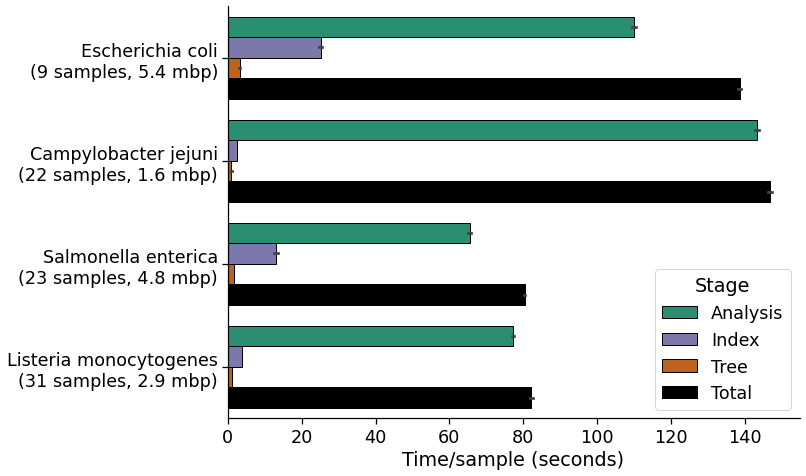

In [5]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_runtime_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.catplot(y='Label', x='Time/sample (seconds)', hue="Stage", ci="sd", kind="bar",
                    data=index_info_runtime_df, edgecolor='black',
                    height=7, aspect=1.7, linewidth=1,
                    legend_out=False,
                    order=cat_order,
                    palette=stages_palette)
    g.set(ylabel=None)

    plt.savefig('figures/index-runtime.pdf')

#### 2.1.2.1. Mean/stdevs

In [6]:
index_info_runtime_df[['Label', 'Stage', 'Time/sample (seconds)']]\
 .groupby(['Label', 'Stage']).agg(['mean', 'std', 'count'])

Time/sample (seconds)  \
                                                                        mean   
Label                                         Stage                            
Campylobacter jejuni\n(22 samples, 1.6 mbp)   Analysis            143.235152   
                                              Index                 2.482879   
                                              Total               146.721818   
                                              Tree                  1.003788   
Escherichia coli\n(9 samples, 5.4 mbp)        Analysis            109.954815   
                                              Index                25.180000   
                                              Total               138.464815   
                                              Tree                  3.330000   
Listeria monocytogenes\n(31 samples, 2.9 mbp) Analysis             77.169247   
                                              Index                 3.794409   
                                              Total                82.123441   
                                              Tree                  1.159785   
Salmonella enterica\n(23 samples, 4.8 mbp)    Analysis             65.474493   
                                              Index                13.134348   
                                              Total                80.291739   
                                              Tree                  1.682899   

                                                                        
                                                             std count  
Label                                         Stage                     
Campylobacter jejuni\n(22 samples, 1.6 mbp)   Analysis  0.614168     3  
                                              Index     0.072955     3  
                                              Total     0.700044     3  
                                              Tree      0.081796     3  
Escherichia coli\n(9 samples, 5.4 mbp)        Analysis  0.649049     3  
                                              Index     0.530105     3  
                                              Total     0.605590     3  
                                              Tree      0.163779     3  
Listeria monocytogenes\n(31 samples, 2.9 mbp) Analysis  0.419675     3  
                                              Index     0.021594     3  
                                              Total     0.411775     3  
                                              Tree      0.076892     3  
Salmonella enterica\n(23 samples, 4.8 mbp)    Analysis  0.510003     3  
                                              Index     0.612530     3  
                                              Total     0.323857     3  
                                              Tree      0.046084     3

## 2.2. Memory plots

In [7]:
def melt_memory(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df[~df['Tree memory (max)'].isna()]
    value_vars = ['Analysis memory (max)', 'Index memory (max)', 'Tree memory (max)']

    df = pd.melt(df, id_vars=id_vars,
            value_vars=value_vars)
    df['value'] = df['value'].apply(lambda x: x/(1024**3))
    df = df.rename({'variable': 'Stage', 'value': 'Peak Memory (GB)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' memory (max)', '', regex=False)
    
    df['Peak Memory/sample (GB)'] = df['Peak Memory (GB)'] / df['Number samples']
    
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
        
    df['Label'] = df['Organism'] + "\n(" + df['Number samples'].astype('str') + " samples, " + \
             df['Reference length (Mbp)'].apply(lambda x: f'{x:0.1f}') + ' mbp)'
    
    return df

index_info_memory_df = melt_memory(index_info_df, id_vars=['Name', 'Organism',
                                                            'Number samples', 'Reference length'])
index_info_memory_df

,Name,Organism,Number samples,Reference length,Stage,Peak Memory (GB),Peak Memory/sample (GB),Reference length (Mbp),Label
0,0810PADBR-1,Campylobacter jejuni,22,1634890,Analysis,13.978313,0.635378,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
1,1405WAEXK-1,Escherichia coli,9,5412686,Analysis,4.990540,0.554504,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"
2,1408MLGX6-3WGS,Listeria monocytogenes,31,2939733,Analysis,9.316364,0.300528,2.939733,"Listeria monocytogenes\n(31 samples, 2.9 mbp)"
3,1203NYJAP-1 - Tuna Scrape Outbreak,Salmonella enterica,23,4808805,Analysis,6.381649,0.277463,4.808805,"Salmonella enterica\n(23 samples, 4.8 mbp)"
4,0810PADBR-1,Campylobacter jejuni,22,1634890,Analysis,14.260551,0.648207,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
5,1405WAEXK-1,Escherichia coli,9,5412686,Analysis,5.012787,0.556976,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"
6,1408MLGX6-3WGS,Listeria monocytogenes,31,2939733,Analysis,9.081951,0.292966,2.939733,"Listeria monocytogenes\n(31 samples, 2.9 mbp)"
7,1203NYJAP-1 - Tuna Scrape Outbreak,Salmonella enterica,23,4808805,Analysis,6.156277,0.267664,4.808805,"Salmonella enterica\n(23 samples, 4.8 mbp)"
8,0810PADBR-1,Campylobacter jejuni,22,1634890,Analysis,13.598072,0.618094,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
9,1405WAEXK-1,Escherichia coli,9,5412686,Analysis,4.939163,0.548796,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"


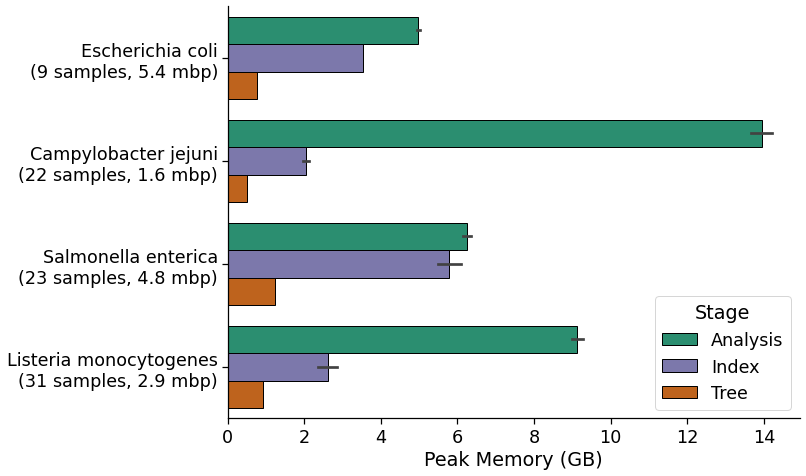

In [8]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_memory_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.catplot(y='Label', x='Peak Memory (GB)', hue="Stage", ci="sd", kind="bar",
                    data=index_info_memory_df, edgecolor='black',
                    height=7, aspect=1.7, linewidth=1,
                    legend_out=False,
                    order=cat_order,
                    palette=stages_palette)
    g.set(ylabel=None)

    plt.savefig('figures/index-memory.pdf')

### 2.2.1. Mean/stddev

In [9]:
index_info_memory_df[['Label', 'Stage', 'Peak Memory (GB)']]\
 .groupby(['Label', 'Stage']).agg(['mean', 'std', 'count'])

Peak Memory (GB)  \
                                                                   mean   
Label                                         Stage                       
Campylobacter jejuni\n(22 samples, 1.6 mbp)   Analysis        13.945646   
                                              Index            2.043215   
                                              Tree             0.507160   
Escherichia coli\n(9 samples, 5.4 mbp)        Analysis         4.980830   
                                              Index            3.544790   
                                              Tree             0.762501   
Listeria monocytogenes\n(31 samples, 2.9 mbp) Analysis         9.123538   
                                              Index            2.612534   
                                              Tree             0.926168   
Salmonella enterica\n(23 samples, 4.8 mbp)    Analysis         6.248164   
                                              Index            5.787234   
                                              Tree             1.243949   

                                                                        
                                                             std count  
Label                                         Stage                     
Campylobacter jejuni\n(22 samples, 1.6 mbp)   Analysis  0.332446     3  
                                              Index     0.098933     3  
                                              Tree      0.000043     3  
Escherichia coli\n(9 samples, 5.4 mbp)        Analysis  0.037760     3  
                                              Index     0.000409     3  
                                              Tree      0.000534     3  
Listeria monocytogenes\n(31 samples, 2.9 mbp) Analysis  0.175763     3  
                                              Index     0.309345     3  
                                              Tree      0.000343     3  
Salmonella enterica\n(23 samples, 4.8 mbp)    Analysis  0.118305     3  
                                              Index     0.367927     3  
                                              Tree      0.000851     3

## 2.3. Disk usage plots

In [10]:
def melt_disk_usage(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df.copy()
    df['Index size'] = df['Index size (organism)']
    
    df['Total size'] = df['Analysis disk uage'] + df['Index size']
    df = pd.melt(df, id_vars=id_vars,
            value_vars=['Analysis disk uage', 'Index size'])
    df['value'] = df['value'].apply(lambda x: x/(1024**2))
    df = df.rename({'variable': 'Stage', 'value': 'Disk (MB)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' disk uage', '', regex=False)
    df['Stage'] = df['Stage'].str.replace(' size', '', regex=False)
    
    df['Disk/sample (MB)'] = df['Disk (MB)'] / df['Number samples']
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
        
    df['Label'] = df['Organism'] + "\n(" + df['Number samples'].astype('str') + " samples, " + \
                 df['Reference length (Mbp)'].apply(lambda x: f'{x:0.1f}') + ' mbp)'
    
    return df
index_info_disk_df = melt_disk_usage(index_info_df, id_vars=['Name', 'Organism',
                                                              'Number samples', 'Reference length'])
index_info_disk_df

,Name,Organism,Number samples,Reference length,Stage,Disk (MB),Disk/sample (MB),Reference length (Mbp),Label
0,0810PADBR-1,Campylobacter jejuni,22,1634890,Analysis,11455.867188,520.721236,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
1,1405WAEXK-1,Escherichia coli,9,5412686,Analysis,6260.304688,695.589410,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"
2,1408MLGX6-3WGS,Listeria monocytogenes,31,2939733,Analysis,10315.359375,332.753528,2.939733,"Listeria monocytogenes\n(31 samples, 2.9 mbp)"
3,1203NYJAP-1 - Tuna Scrape Outbreak,Salmonella enterica,23,4808805,Analysis,8607.515625,374.239810,4.808805,"Salmonella enterica\n(23 samples, 4.8 mbp)"
4,0810PADBR-1,Campylobacter jejuni,22,1634890,Analysis,11455.875000,520.721591,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
5,1405WAEXK-1,Escherichia coli,9,5412686,Analysis,6260.316406,695.590712,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"
6,1408MLGX6-3WGS,Listeria monocytogenes,31,2939733,Analysis,10315.421875,332.755544,2.939733,"Listeria monocytogenes\n(31 samples, 2.9 mbp)"
7,1203NYJAP-1 - Tuna Scrape Outbreak,Salmonella enterica,23,4808805,Analysis,8607.480469,374.238281,4.808805,"Salmonella enterica\n(23 samples, 4.8 mbp)"
8,0810PADBR-1,Campylobacter jejuni,22,1634890,Analysis,11455.859375,520.720881,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
9,1405WAEXK-1,Escherichia coli,9,5412686,Analysis,6260.308594,695.589844,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"


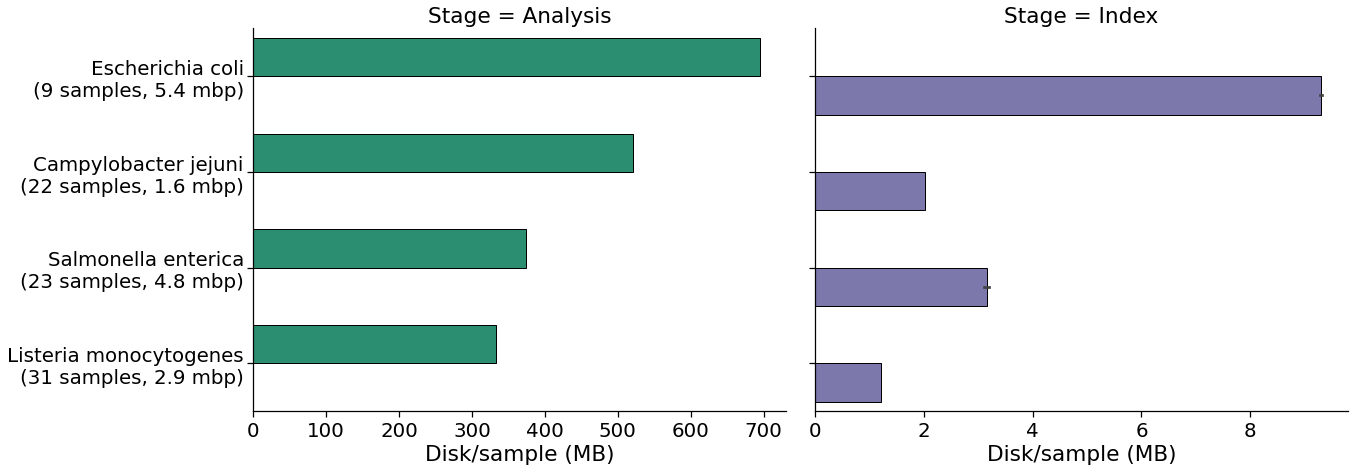

In [11]:
with sns.plotting_context("notebook", font_scale=1.8):
    cat_order = index_info_disk_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.catplot(y='Label', x='Disk/sample (MB)', col="Stage", hue="Stage", ci="sd", kind="bar",
                    data=index_info_disk_df, edgecolor='black',
                    height=7, aspect=1.4, linewidth=1,
                    legend_out=False,
                    order=cat_order,
                    palette=stages_palette,
                    sharex=False)
    g.set(ylabel=None)

    plt.savefig('figures/index-disk.pdf')

### 2.3.1. Mean/stddev

In [12]:
index_info_disk_df[['Label', 'Stage', 'Disk/sample (MB)']]\
 .groupby(['Label', 'Stage']).agg(['mean', 'std', 'count'])

Disk/sample (MB)  \
                                                                   mean   
Label                                         Stage                       
Campylobacter jejuni\n(22 samples, 1.6 mbp)   Analysis       520.721236   
                                              Index            2.016158   
Escherichia coli\n(9 samples, 5.4 mbp)        Analysis       695.589988   
                                              Index            9.305122   
Listeria monocytogenes\n(31 samples, 2.9 mbp) Analysis       332.754830   
                                              Index            1.207787   
Salmonella enterica\n(23 samples, 4.8 mbp)    Analysis       374.239470   
                                              Index            3.150306   

                                                                        
                                                             std count  
Label                                         Stage                     
Campylobacter jejuni\n(22 samples, 1.6 mbp)   Analysis  0.000355     3  
                                              Index     0.000470     3  
Escherichia coli\n(9 samples, 5.4 mbp)        Analysis  0.000663     3  
                                              Index     0.028708     3  
Listeria monocytogenes\n(31 samples, 2.9 mbp) Analysis  0.001129     3  
                                              Index     0.005240     3  
Salmonella enterica\n(23 samples, 4.8 mbp)    Analysis  0.001061     3  
                                              Index     0.049873     3